### Student Activity: Returns Over Date Ranges

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for specified date ranges.


In [50]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV in as DataFrame

In [27]:
# Set the path
csv_path = Path("../Resources/amd_stock_data.csv")

# Read in the CSV as a DataFrame
data = pd.read_csv(csv_path)

### View Summary Statistics

In [28]:
# Output summary statistics for csv data
data.describe()

,close,volume,open,high,low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,7.561573,3.535586e+07,7.564402,7.727118,7.393507
std,5.814291,3.357519e+07,5.816548,5.961393,5.660075
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,3.610000,1.467149e+07,3.615000,3.680000,3.540000
50%,5.950000,2.372014e+07,5.930000,6.090000,5.790000
75%,9.450000,4.286763e+07,9.450000,9.590000,9.260000
max,32.720000,3.238445e+08,33.180000,34.140000,32.190000


### Drop Extra Columns


In [29]:
# Drop unnecessary columns
data.drop(columns=["volume", "open", "high", "low"], inplace=True)
data.head()

,date,close
0,4/29/09,3.51
1,4/30/09,3.61
2,5/1/09,3.82
3,5/4/09,4.26
4,5/5/09,4.32


### Set Date as Index


In [30]:
# Set the date as the index to the DataFrame
data.set_index(pd.to_datetime(data["date"], infer_datetime_format=True), inplace=True)
data

,date,close
date,,
2009-04-29,4/29/09,3.51
2009-04-30,4/30/09,3.61
2009-05-01,5/1/09,3.82
2009-05-04,5/4/09,4.26
2009-05-05,5/5/09,4.32
...,...,...
2019-04-23,4/23/19,27.97
2019-04-24,4/24/19,28.46
2019-04-25,4/25/19,27.66


### Drop Extra Date Column

In [31]:
# Drop the extra date column
data = data.drop(columns=("date"))
data


,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32
...,...
2019-04-23,27.97
2019-04-24,28.46
2019-04-25,27.66


### Calculate Daily Returns


In [32]:
# Calculate the daily return over the last 10 years
datily_return = data.pct_change()
datily_return

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Use Indexing to Create Date Ranges


In [33]:
# Slice DataFrame into 1 year timeframe
year_1 = datily_return.loc['2018-04-30':'2019-04-29']
year_1

# Slice DataFrame into 3 year timeframe
year_3 = datily_return.loc['2016-04-29':'2019-04-29']
year_3

# Slice DataFrame into 5 year timeframe
year_5 = datily_return.loc['2014-04-30':'2019-04-29']
year_5

# Slice DataFrame into 10 year timeframe
year_10 = datily_return.loc['2009-04-29':'2019-04-29']
year_10

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Output Summary Statistics for 1 Year of Daily Returns 


In [51]:
# Display summary statistics for 1 year of AMD stock data
year_1.describe()

,close
count,251.000000
mean,0.004538
std,0.042522
min,-0.154454
25%,-0.015975
50%,0.002397
75%,0.023978
max,0.199481


### Output Summary Statistics for 3 Years of Daily Returns 


In [35]:
# Display summary statistics for 3 years of AMD stock data
year_3.describe()

,close
count,754.000000
mean,0.003455
std,0.038744
min,-0.242291
25%,-0.016535
50%,0.002061
75%,0.021532
max,0.199481


### Output Summary Statistics for 5 Years of Daily Returns

In [36]:
# Display summary statistics for 5 years of AMD stock data
year_5.describe()

,close
count,1258.000000
mean,0.002304
std,0.039953
min,-0.242291
25%,-0.016535
50%,0.000776
75%,0.019021
max,0.522901


### Output Summary Statistics for 10 Years of Daily Returns 

In [37]:
# Display summary statistics for 10 years of AMD stock data
year_10.describe()

,close
count,2516.000000
mean,0.001488
std,0.036897
min,-0.242291
25%,-0.016844
50%,0.000000
75%,0.018524
max,0.522901


### Plot 1 Year of Daily Returns 

<AxesSubplot:xlabel='date'>

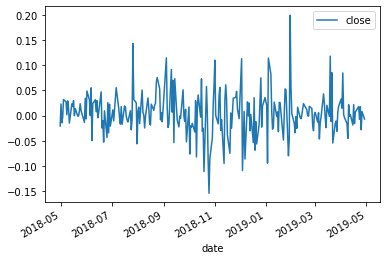

In [52]:
# Display chart of 1 year's worth of daily AMD returns
year_1.plot()

### Plot 3 Years of Daily Returns

<AxesSubplot:xlabel='date'>

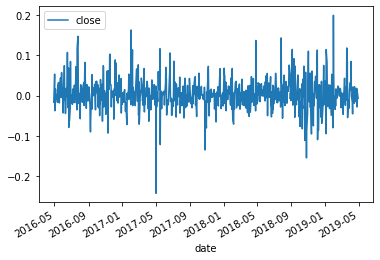

In [53]:
# Display chart of 3 year's worth of daily AMD returns
year_3.plot()

### Plot 5 Years of Daily Returns

<AxesSubplot:xlabel='date'>

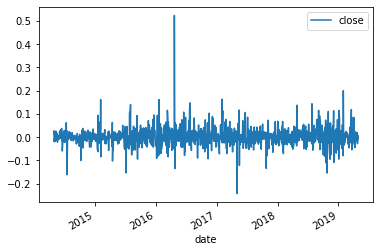

In [54]:
# Display chart of 5 year's worth of daily AMD returns
year_5.plot()

### Plot 10 Years of Daily Returns

<AxesSubplot:xlabel='date'>

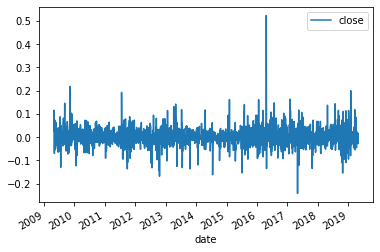

In [55]:
# Display chart of 10 year's worth of daily AMD returns
year_10.plot()

### Analyze Daily Returns over Date Ranges

1. What are the average daily returns over each date range?

    * 1 Year = 
    * 3 Year = 
    * 5 Year = 
    * 10 Year = 
    
    
2. What insights could this provide in regards to wanting to trade AMD stock in the long-term vs. short-term? 

